## Emotion Detection and Recognition
**<div style="text-align: right"> [Total score: 14]</div>**

We detected emotions from the text using scikit-learn in module-2 project. Now, we will use keras with word embeddings and LSTM layers to make the classification model.

### Ex1: Import Keras and other libraries
Don't forget to import embedding layer and LSTM from Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras, string, nltk
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


Using TensorFlow backend.


### Ex2: Load and Preprocess the Dataset
**<div style="text-align: right"> [Score: 1]</div>**
1. Read the dataset ISEAR.csv which is in the current path.
2. Set the column names to Emotions and Sentence.
2. Visualize and clean the dataset.
3. Perform any preprocessing that may be useful

The data should possess only these emotions: 'joy', 'fear', 'anger', 'sadness', 'disgust', 'shame' and 'guilt'.

In [2]:
column_names = ['Emotions', 'Sentence']
df = pd.read_csv('ISEAR.csv', names = column_names)
del df['Sentence']
df = df.reset_index()
df.rename(index = str, columns = {"index" :"Emotions", "Emotions" : "Sentences"}, inplace = True)
df.head()

,Emotions,Sentences
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [3]:
df.describe()

,Emotions,Sentences
count,7516,7516
unique,8,7449
top,joy,When my grandfather died.
freq,1092,8


In [4]:
#### INTENTIONALLY LEFT BLANK####

### Ex3: Clean the dataset
**<div style="text-align: right"> [Score: 1]</div>**
1. Check if any values in the dataset contains null.
2. Drop all the null values if it exists.

In [5]:
df.dropna(inplace=True)

In [6]:
#### INTENTIONALLY LEFT BLANK####

In [7]:
print("The emotions to be classified are: "+ str(list(df.Emotions.unique().tolist())))

The emotions to be classified are: ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'guit']


Are you sure your data is clean ? <br>
See if the spelling of guilt is incorrectly written as guit in some sentences.<br>
**<div style="text-align: right"> [Score: 1]</div>**

In [8]:
# YOUR CODE HERE
df["Emotions"].replace("guit", "guilt", inplace = True)
print("We need to classify "+ str(df.Emotions.nunique()) +" emotions now.")
print("The emotions to be classified are: "+ str(list(df.Emotions.unique())))

We need to classify 7 emotions now.
The emotions to be classified are: ['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt']


In [9]:
from collections import Counter
Counter(df["Emotions"].values)

Counter({'anger': 1079,
         'disgust': 1066,
         'fear': 1076,
         'guilt': 1050,
         'joy': 1092,
         'sadness': 1082,
         'shame': 1071})

In [10]:
#### INTENTIONALLY LEFT BLANK####

### Ex4: Further NLP based text Cleaning (Not Necessary to Implement all)
You can try 
- removing punctuations,
- converting words to lower case 
- using the stem of each word
- other preprocessing techniques

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fusemachines/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def clean_text(text):
    text = text.translate(string.punctuation)
    text = text.lower().split()
    
    from nltk.corpus import stopwords
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
   
df['Sentences'] = df['Sentences'].map(lambda x: clean_text(x))

In [13]:
X, y = df['Sentences'], df['Emotions']

### Ex5: Transform y to one-hot-encoding

In [14]:
onehot_y = None
from keras.utils import np_utils
encoder = LabelEncoder()
encoded_y = encoder.fit_transform(y)
onehot_y = np_utils.to_categorical(encoded_y)

### Ex  6: Tokenize the sentences
Tokenization of sentences is one of the essential parts in natural language processing. Tokenization simply divides a sentence into a list of words. 
<br>We will use Keras tokenizer function to tokenize the strings and ‘texts_to_sequences’ to make sequences of words. You might also want to pad the sequences.

In [15]:
vocab = set()
a = [vocab.add(el) for s in X.values for el in s.split(' ')]
print("Total unique words : ", len(a))

Total unique words :  80896


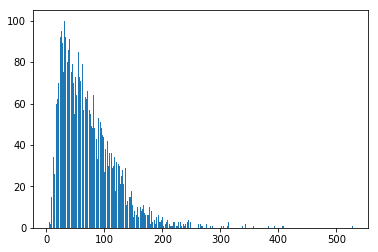

Min :  4
Median :  63.0
Max :  528


In [16]:
l = [len(s) for s in X.values]
counts = Counter(l)
plt.bar(counts.keys(), counts.values())
plt.show()
print("Min : ", min(l))
print("Median : ", np.median(l))
print("Max : ", max(l))

In [17]:
vocabulary_size = None  # Select an Appropriate Vobabulary Size
padded_length = None  # Select an Appropriate padded Length for text
tokenizer = None 
# YOUR CODE HERE
vocabulary_size = 80896
padded_length = 155
tokenizer = Tokenizer(num_words = vocabulary_size)
tokenizer.fit_on_texts(X)


In [18]:
def preprocessing(X):
    sequences = tokenizer.texts_to_sequences(X)
    data = pad_sequences(sequences, maxlen = padded_length)
    return data
data = preprocessing(X)

In [19]:
onehot_y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

### Ex7: Split the data into Train and Test
Split the data into train and test with padded sequences as input and the encoded categorical y as the output; test size of 0.1 and random state of 101.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, onehot_y, test_size = 0.1, random_state = 101, stratify = onehot_y )

### Ex8: Model and Compile your Neural Network Architecture
**<div style="text-align: right"> [Score: 2]</div>**
Try to Include 
1. Embedding layer
2. LSTM with dropout
3. Dense Output layere
4. Use any other layers as required

In [21]:
model = None
learning_rate = 1e-2
numEpoch = 50
embedding_size = 200
lstm_size = 64
seed = 2019
import tensorflow as tf
import keras
from keras import optimizers, regularizers
from keras.layers import Dense, Flatten, LSTM, Dropout, Activation
from keras.layers.embeddings import Embedding

def create_model(embedding_size = 100, lstm_size = 32, layer1_size = 32, dropoutrate = 0.3):
    model = keras.models.Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length = padded_length, embeddings_regularizer = regularizers.l1(0.001)))
    model.add(LSTM(lstm_size, dropout = dropoutrate, recurrent_dropout = dropoutrate))
    model.add(Dense(layer1_size, activation = 'relu'))
    model.add(Dropout(dropoutrate, seed = seed))
    model.add(Dense(7, activation = "softmax"))
    
    optim = optimizers.Adam(lr = learning_rate, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = learning_rate/numEpoch)
    model.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])
    model.summary()
    return model
model = create_model(embedding_size = embedding_size, lstm_size = lstm_size, layer1_size = 32, dropoutrate = 0.3)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 155, 200)          16179200  
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                67840     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 16,249,351
Trainable params: 16,249,351
Non-trainable params: 0
_________________________________________________________________


In [22]:
#### INTENTIONALLY LEFT BLANK####

### Ex9: Set Callback functions and Train your Model
Must include ModelCheckpoint

In [23]:
checkpoint_path = 'best_model.h5'
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3),
            ModelCheckpoint(checkpoint_path, save_weights_only = True, save_best_only = True, verbose = 0)]

**Caution** Comment out the training section before submitting. Submit the code by loading Checkpoint model

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'upper right')
    plt.show()

In [ ]:
# Train your model
# history = model.fit(X_train, y_train, batch_size = 32, validation_split = 0.2, epochs = numEpoch, callbacks= callbacks)
# plot(history)


Train on 5411 samples, validate on 1353 samples
Epoch 1/50
5411/5411 [==============================] - 217s 40ms/step - loss: 34.9185 - acc: 0.1613 - val_loss: 23.2635 - val_acc: 0.2114
Epoch 2/50
5411/5411 [==============================] - 195s 36ms/step - loss: 22.6991 - acc: 0.2382 - val_loss: 23.7615 - val_acc: 0.2676
Epoch 3/50
3296/5411 [=================>............] - ETA: 1:20 - loss: 22.1308 - acc: 0.2633

### Final Task
**<div style="text-align: right"> [Score: 9]</div>**
Comment out the previous training section and submit by loading your checkpoint below
As the Dataset is small your test score and accuracy may be less but will probably perform better in hidden test set.
Aim to achieve a score higher than 50 % or higher than your scikit learn project on the same dataset.

In [ ]:
train_model = model.load_weights(checkpoint_path)
score = model.evaluate(X_test, y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

In [ ]:
from sklearn import metrics
prediction = model.predict(X_test)

test_y = encoder.inverse_transform(np.argmax(y_test, axis=1, out=None))
pred_y = encoder.inverse_transform(np.argmax(prediction, axis=1, out=None))
print(metrics.classification_report(test_y, pred_y))

In [ ]:
cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure(figsize=(7,7))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
ticks =encoder.inverse_transform(range(7)).astype(str)
plt.xticks(range(7), ticks)
plt.yticks(range(7), ticks)
plt.show()

In [ ]:
#### INTENTIONALLY LEFT BLANK####

In [ ]:
#### INTENTIONALLY LEFT BLANK####

In [ ]:
#### INTENTIONALLY LEFT BLANK####

Congratulations, you have reached the end of the Assignment.